## Objective:

### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Steps and Tasks

### 1. Import the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns     # library for advance visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
from sklearn import metrics
#import pydotplus as pydot
from sklearn import tree
from os import system

### 2. Read the data as a data frame 

In [2]:
bank_data = pd.read_csv('bank-full.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Perform basic EDA which should include the following and print out your insights at every step.

### a. Shape of the data

In [3]:
bank_data.shape

(45211, 17)

**There are 45211 Observations / Rows and 17 Attributes / Columns.**

### b. Data type of each attribute 

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Lets convert the columns with an 'object' datatype into categorical variables

In [89]:

print(bank_data.job.value_counts())
print(bank_data.marital.value_counts())
print(bank_data.education.value_counts())
print(bank_data.default.value_counts())
print(bank_data.housing.value_counts())
print(bank_data.loan.value_counts())
print(bank_data.contact.value_counts())
print(bank_data.month.value_counts())
print(bank_data.poutcome.value_counts())
print(bank_data.Target.value_counts())



blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [5]:
for feature in bank_data.columns: # Loop through all columns in the dataframe
    if bank_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_data[feature] = pd.Categorical(bank_data[feature])# Replace strings with an integer
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [7]:
replaceStruct = {
                 "education":     {"primary": 1,"secondary": 2 ,"tertiary": 3 ,"unknown": -1 },
                 "month": {"jan": 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},
                 "default":     {"no": 1, "yes": 2 } ,
                 "housing":     {"no": 1, "yes": 2 },
                "loan":     {"no": 1, "yes": 2 },
                "poutcome":     {"success": 1, "failure": 2,"other": 3,"unknown": -1 },
                 "Target":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["contact","housing","marital","job"]


In [8]:
bank_data=bank_data.replace(replaceStruct)
bank_data=pd.get_dummies(bank_data, columns=oneHotCols)
bank_data.head(10)


,age,education,default,balance,loan,day,month,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,3,1,2143,1,5,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,29,1,5,5,151,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,2,1,2,2,5,5,76,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,-1,1,1506,1,5,5,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,-1,1,1,1,5,5,198,1,-1,...,0,0,0,0,0,0,0,0,0,1
5,35,3,1,231,1,5,5,139,1,-1,...,0,0,1,0,0,0,0,0,0,0
6,28,3,1,447,2,5,5,217,1,-1,...,0,0,1,0,0,0,0,0,0,0
7,42,3,2,2,1,5,5,380,1,-1,...,1,0,0,0,0,0,0,0,0,0
8,58,1,1,121,1,5,5,50,1,-1,...,0,0,0,1,0,0,0,0,0,0
9,43,2,1,593,1,5,5,55,1,-1,...,0,0,0,0,0,0,0,1,0,0


### c. Checking the presence of missing values 

In [9]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( bank_data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
age,0
education,0
default,0
balance,0
loan,0
day,0
month,0
duration,0
campaign,0
pdays,0


**There are several missing values which are tagged as Unknown , we have encoded using OneHot encode**

### d. 5 Point summary of numerical attributes 

In [10]:
bank_data.describe()

,age,education,default,balance,loan,day,month,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,2.019442,1.018027,1362.272058,1.160226,15.806419,6.144655,258.163080,2.763841,40.197828,...,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370
std,10.618762,0.902795,0.133049,3044.765829,0.366820,8.322476,2.408034,257.527812,3.098021,100.128746,...,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559
min,18.000000,-1.000000,1.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,72.000000,1.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,1.000000,448.000000,1.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,3.000000,1.000000,1428.000000,1.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,95.000000,3.000000,2.000000,102127.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### e.  Checking the presence of outliers 

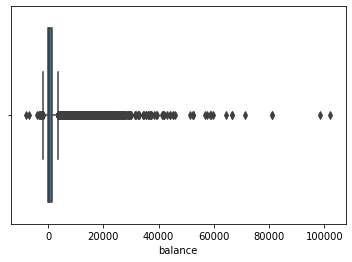

In [11]:
sns.boxplot(x=bank_data['balance'])   # box plot

**Note:** Above plot shows several points after 15000 and in negative range (< 0), these are outliers as they are not included in the box of other observation i.e no where near the quartiles.

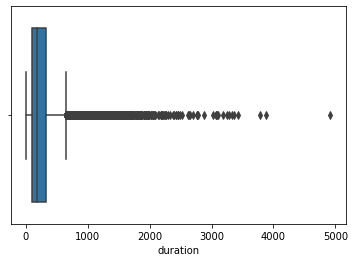

In [12]:
sns.boxplot(x=bank_data['duration']) 

**Note:** Above plot shows several points after 700-800 range, these are outliers as they are not included in the box of other observation i.e no where near the quartiles.

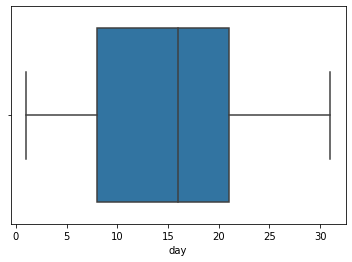

In [13]:
sns.boxplot(x=bank_data['day']) 

**Note:** Above plot shows no outliers as there are no points included in the box of other observation 

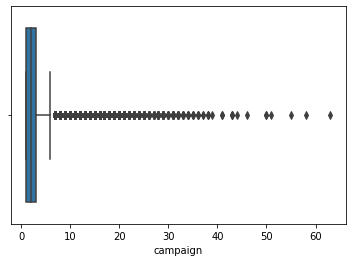

In [14]:
sns.boxplot(x=bank_data['campaign']) 

**Note:** Above plot shows several points after 7-8 range, these are outliers as they are not included in the box of other observation i.e no where near the quartiles.

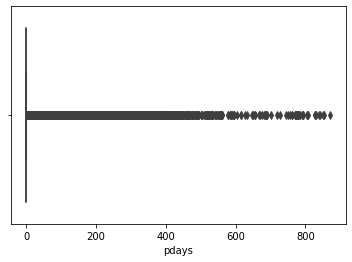

In [15]:
sns.boxplot(x=bank_data['pdays']) 

**Note:** Above plot shows several points as outliers.

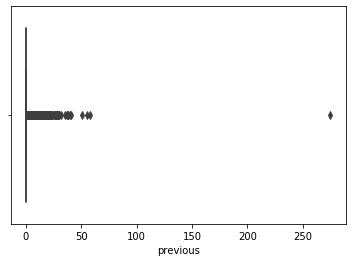

In [16]:
sns.boxplot(x=bank_data['previous']) 

**Note:** Above plot shows as outliers.

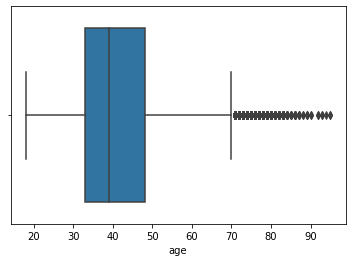

In [17]:
sns.boxplot(x=bank_data['age']) 

**Note:** Above plot shows several points after 70, these are outliers as they are not included in the box of other observation i.e no where near the quartiles.

## 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

#### We will use 70% of data for training and 30% for testing

In [18]:

X = bank_data.drop('Target',axis=1)     # Predictor feature columns (8 X m)
Y = bank_data['Target']   # Predicted class (no=True, yes=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head(20)

,age,education,default,balance,loan,day,month,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
6149,32,2,2,-238,1,27,5,427,1,-1,...,0,0,0,0,0,0,0,0,0,0
12403,34,2,1,-478,2,27,6,111,4,-1,...,0,0,0,0,0,0,0,0,0,0
21645,32,2,1,266,1,19,8,168,2,-1,...,0,0,0,0,0,0,0,1,0,0
29580,36,2,2,13,2,3,2,150,4,-1,...,0,0,0,0,0,0,0,0,0,0
31245,23,2,1,486,1,3,3,87,1,-1,...,0,0,0,0,0,0,1,0,0,0
32032,82,1,1,2140,1,14,4,118,6,-1,...,0,1,0,0,0,0,0,0,0,0
18295,45,3,1,385,2,31,7,12,16,-1,...,0,0,1,0,0,0,0,0,0,0
42774,36,3,1,3949,1,28,1,130,2,-1,...,0,0,1,0,0,0,0,0,0,0
26345,32,2,1,658,1,20,11,173,2,-1,...,0,0,0,0,0,0,0,0,0,0
31747,39,2,1,600,1,7,4,277,1,-1,...,0,0,0,0,0,1,0,0,0,0


Lets check split of data

In [19]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [20]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(bank_data.loc[bank_data['Target'] == 1]), (len(bank_data.loc[bank_data['Target'] == 1])/len(bank_data.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(bank_data.loc[bank_data['Target'] == 0]), (len(bank_data.loc[bank_data['Target'] == 0])/len(bank_data.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



## 5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. 

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'. 

In [21]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Scoring our Decision Tree

In [22]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))
## Visualizing the Decision Tree

1.0
0.8737835446770864


* The Model accuracy for Decision tree is 87.37%

0.8737835446770864


(2.0, 0.0)

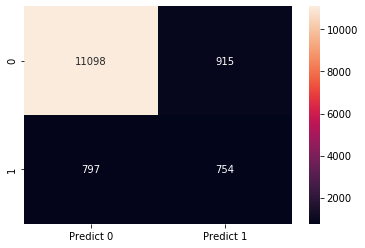

In [46]:

print(dTree.score(x_test , y_test))
y_predict = dTree.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
#plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 754

True Negatives (TN): we correctly predicted that client will not subscribe the term deposit 11098

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit (a "Type I error") 915 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will not subscribe the term deposit  (a "Type II error") 797 Falsely predict negative Type II error

## Reducing over fitting (Regularization)

In [23]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.8951559389515594
0.8969330580949573


* The Model Accuracy for Regularized decision tree is 89.69%. This is an improved version of earlier decision tree as we have reduced the max_depth = 3

In [25]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                        Imp
age                0.050630
education          0.000000
default            0.000000
balance            0.000000
loan               0.000000
day                0.000000
month              0.000000
duration           0.589925
campaign           0.000000
pdays              0.096042
previous           0.000000
poutcome           0.228657
contact_cellular   0.006134
contact_telephone  0.000000
contact_unknown    0.028612
housing_1          0.000000
housing_2          0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000


* The metrics with higher importance 'duration' and 'poutcome'

0.8969330580949573


(2.0, 0.0)

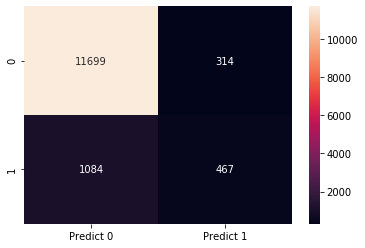

In [39]:

print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
#plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 467

True Negatives (TN): we correctly predicted that client will not subscribe the term deposit 11699

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit (a "Type I error") 314 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will not subscribe the term deposit  (a "Type II error") 1084 Falsely predict negative Type II error

## Logistic Regression

In [27]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000315  0.096382 -0.810511  0.000022 -0.627635 -0.006234 -0.003255   

          7         8         9  ...        23        24        25        26  \
0  0.004122 -0.126887  0.001381  ... -0.436734 -0.029975  0.558822 -0.291527   

        27        28        29        30        31  intercept  
0 -0.24575  0.678623 -0.174501 -0.190899 -0.016119  -0.878434  

[1 rows x 33 columns]


In [28]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8902978472427012


* The Model Accuracy is 89.02% which is better than the standard decision tree

(2.0, 0.0)

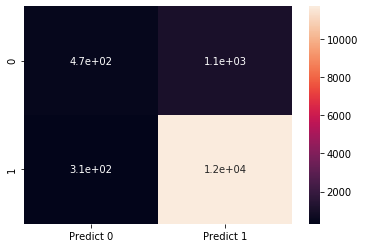

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 12000

True Negatives (TN): we correctly predicted that client will not subscribe the term deposit 4700

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit(a "Type I error") 1100 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will not subscribe the term deposit  (a "Type II error") 310 Falsely predict negative Type II error

## 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

#                             Ensemble Learning - Bagging

In [30]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)


0.9068858743733412


(2.0, 0.0)

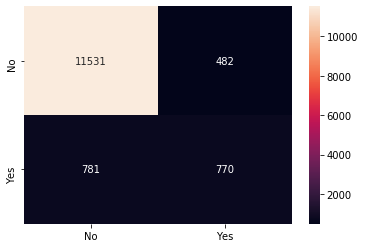

In [31]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

The Model Accuracy is 90.68%

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 770

True Negatives (TN): we correctly predicted that client will not subscribe the term deposit 11531

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit (a "Type I error") 482 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will not subscribe the term deposit  (a "Type II error") 781 Falsely predict negative Type II error

# Ensemble Learning - AdaBoosting

In [32]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)


0.8849896785608965


(2.0, 0.0)

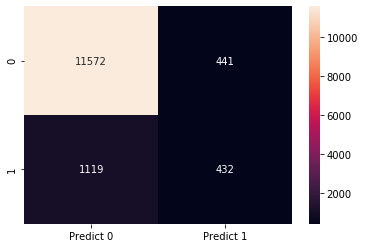

In [43]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The Model Accuracy is 88.49%

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 432

True Negatives (TN): we correctly predicted that client will not subscribe the term deposit 11572

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit (a "Type I error") 441 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will not subscribe the term deposit  (a "Type II error") 1119 Falsely predict negative Type II error

#                     Ensemble Learning - GradientBoost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)


0.9003243880861103


(2.0, 0.0)

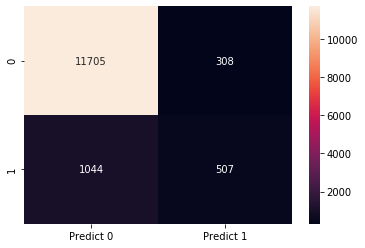

In [44]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The Model Accuracy is 90.03%

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 507

True Negatives (TN): we correctly predicted that client will not subscribe the term deposit 11705

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit (a "Type I error") 308 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will not subscribe the term deposit  (a "Type II error") 1044 Falsely predict negative Type II error

# Ensemble RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)


0.9070333235033913


(2.0, 0.0)

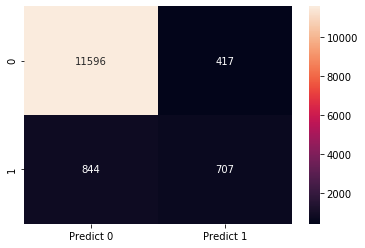

In [45]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The Model Accuracy is 90.7%

The confusion matrix

True Positives (TP): we correctly predicted that client will subscribe the term deposit 707

True Negatives (TN): we correctly predicted that client will subscribe the term deposit 11596

False Positives (FP): we incorrectly predicted that client will subscribe the term deposit (a "Type I error") 417 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that client will subscribe the term deposit (a "Type II error") 844 Falsely predict negative Type II error

## 7. Compare performances of all the models 

### Decision Tree:
* Model Accuracy: 89.7% 

### Logistic Regression:
* Model Accuracy: 89.03%

### Bagging:
* Model Accuracy: 90.68%

### AdaBoosting:
* Model Accuracy: 88.49%

### GradientBoost:
* Model Accuracy: 90%

### Random Forest:
* Model Accuracy: 90.7%

* When comparing the model accuracy, we see that Ensemble technique like Bagging and Random Forest classifier provides better model result. 
* At the same time, when comparing the FN, FP, we find that the false negatives are less for Bagging essemble model and based on domain knowlege, we suggest that company do not want to lose on customers who are likely to subscribe a term deposit. Hence makes it the best model for the problem statement.
#### The best model is  "Model with Bagging Essemble Technique"